## 3D Houses - Plot a single shape file

Import the necessary libraries

In [35]:
import os
import sys

In [36]:
sys.executable

'C:\\Users\\ecebo\\anaconda3\\envs\\houses_3d\\python.exe'

In [88]:
import rasterio
import fiona
import geopandas
import gdal

import matplotlib.pyplot as plt
import numpy
from mpl_toolkits.mplot3d import Axes3D

Dataset path

In [38]:
data_main_folder_path = os.path.abspath("./data/")

selected_DTM_folder_name = 'DHMVIIDTMRAS1m_k01'
selected_DSM_folder_name = 'DHMVIIDSMRAS1m_k01'

DHM_folder_name = 'DHMVII_vdc_k01'
GeoTIFF_folder_name = 'GeoTIFF'

In [39]:
# DSM TIFF file
folder_path = os.path.join(data_main_folder_path, selected_DSM_folder_name, GeoTIFF_folder_name)
file_name = os.listdir(folder_path)
file_name = file_name[0]
file_path = os.path.join(folder_path, file_name)

In [42]:
file_path

'C:\\Users\\ecebo\\MyRepos\\3D_houses\\data\\DHMVIIDSMRAS1m_k01\\GeoTIFF\\DHMVIIDSMRAS1m_k01.tif'

In [41]:
from rasterio.plot import show

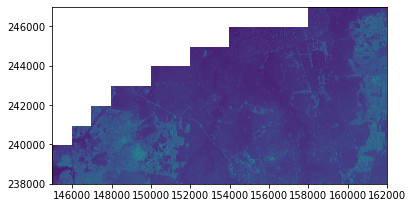

<AxesSubplot:>

In [43]:
img = rasterio.open(file_path)
rasterio.plot.show(img)

In [44]:
print(img.count)
print(img.height, img.width)
print(img.crs)

1
9000 17000
EPSG:31370


In [81]:
img.crs.wkt

'PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972",DATUM["Reseau_National_Belge_1972",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],TOWGS84[-106.869,52.2978,-103.724,0.3366,-0.457,1.8422,-1.2747],AUTHORITY["EPSG","6313"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4313"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",90],PARAMETER["central_meridian",4.36748666666667],PARAMETER["standard_parallel_1",51.1666672333333],PARAMETER["standard_parallel_2",49.8333339],PARAMETER["false_easting",150000.013],PARAMETER["false_northing",5400088.438],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","31370"]]'

In [82]:
img.transform

Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)

In [85]:
print(img.nodatavals)
img.nodata

(-9999.0,)


-9999.0

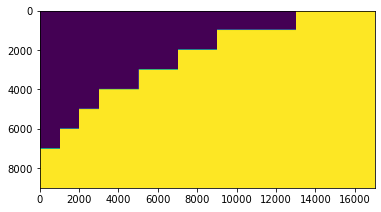

In [94]:
plt.imshow(mask)
plt.show()

In [73]:
img.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [87]:
mask = img.read_masks(1)


In [72]:
print(img.colormap(1))

ValueError: NULL color table

In [49]:
layer = img.read(1)

In [90]:
layer

array([[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,  1.279e+01,
         1.280e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,  1.281e+01,
         1.284e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,  1.283e+01,
         1.288e+01],
       ...,
       [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,  1.693e+01,
         1.690e+01],
       [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,  1.691e+01,
         1.695e+01],
       [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,  1.688e+01,
         1.691e+01]], dtype=float32)

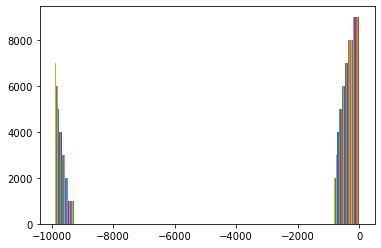

In [55]:
plt.hist(layer)
plt.show()

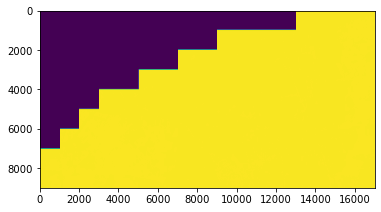

In [59]:
plt.imshow(layer)
plt.show()

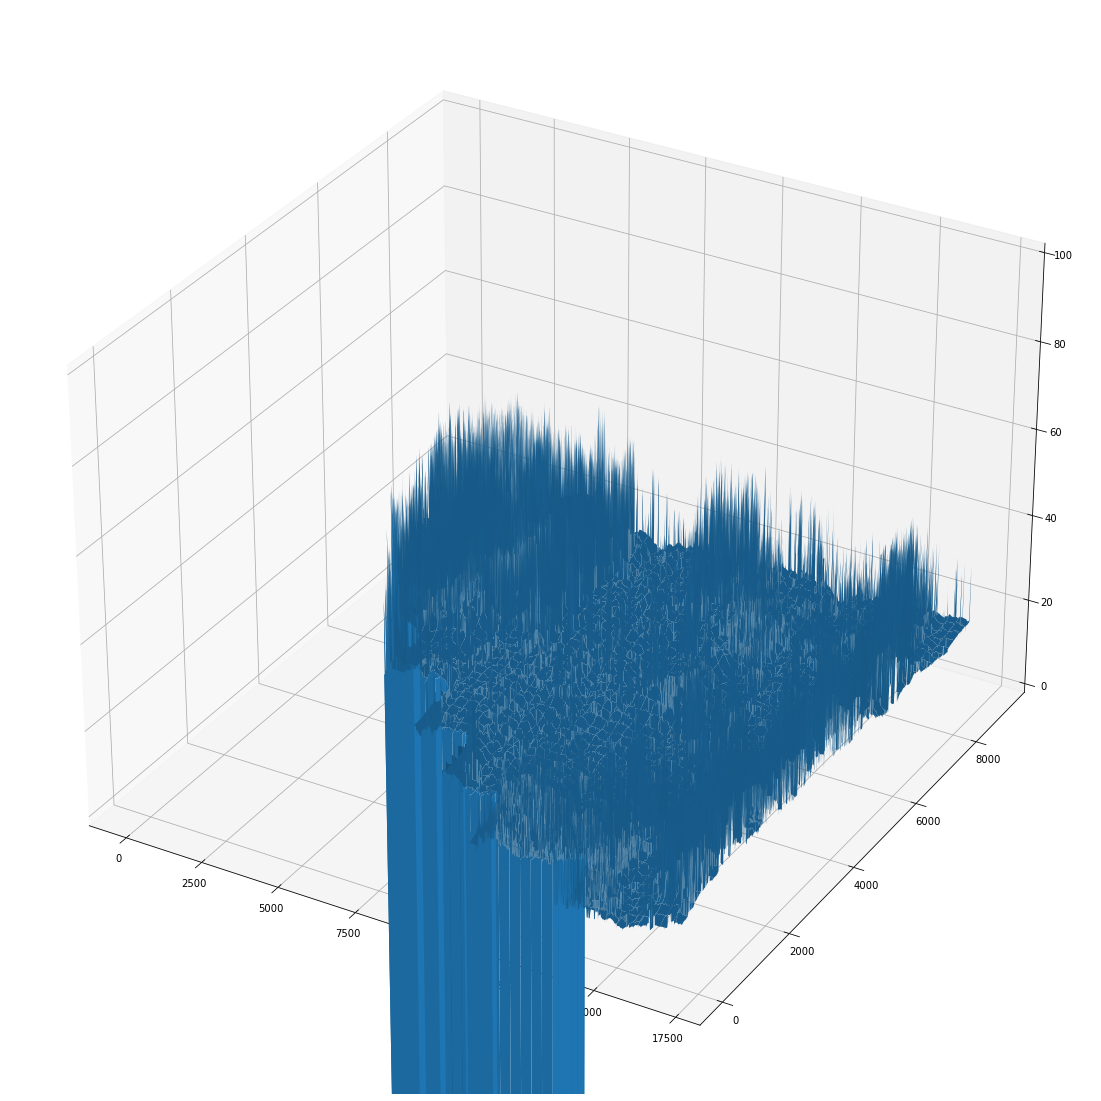

In [103]:
# Plot the layer as a 3D image
nx = layer.shape[1]
ny = layer.shape[0]
x = range(nx)
y = range(ny)

data = layer

hf = plt.figure(figsize=(20,20))
ha = hf.add_subplot(111, projection='3d')

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data)
ha.set_zlim(0, 100)
plt.show()

In [51]:
layers = img.read()
layers

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.695e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,
          1.688e+01,  1.691e+01]]], dtype=float32)

In [52]:
layers.shape

(1, 9000, 17000)

In [10]:
img_gdal = gdal.Open(file_path, gdal.GA_ReadOnly) 

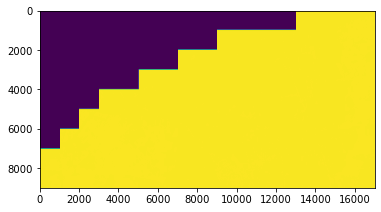

In [11]:
band = img_gdal.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

In [22]:
print(img_gdal.RasterCount, img_gdal.RasterXSize, img_gdal.RasterYSize)
img_gdal.GetLayer(0)

1 17000 9000


In [56]:
# Read from within zip file
# zip:///var/data/example.zip!example.tif

In [18]:
# Shape file
folder_path = os.path.join(data_main_folder_path, selected_DSM_folder_name, DHM_folder_name)
file_name = os.listdir(folder_path)
file_name = file_name[4]
file_path = os.path.join(folder_path, file_name)
file_path

'C:\\Users\\ecebo\\MyRepos\\3D_houses\\data\\DHMVIIDSMRAS1m_k01\\DHMVII_vdc_k01\\DHMVII_vdc_k01.shp'

In [19]:
# Read shape file
shapes_gp = geopandas.read_file(file_path)
shapes_gp

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


In [ ]:
# Read directly from zip
zipfile = "zip:///C:/Users\ecebo\MyRepos\3D_houses\Data\DHMVIIDSMRAS1m_k01/DHMVII_vdc_k01.zip"
shapes_gp_zip = geopandas.read_file(zipfile)


<AxesSubplot:>

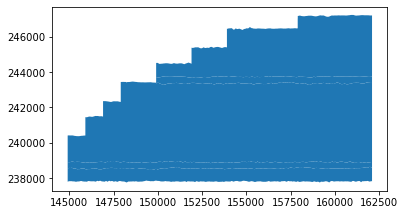

In [21]:
shapes_gp.plot()

In [20]:
shapes_gp.crs

<Projected CRS: PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["B ...>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [98]:
help(geopandas.tools.geocode)

Help on function geocode in module geopandas.tools.geocoding:

geocode(strings, provider=None, **kwargs)
    Geocode a set of strings and get a GeoDataFrame of the resulting points.
    
    Parameters
    ----------
    strings : list or Series of addresses to geocode
    provider : str or geopy.geocoder
        Specifies geocoding service to use. If none is provided,
        will use 'geocodefarm' with a rate limit applied (see the geocodefarm
        terms of service at:
        https://geocode.farm/geocoding/free-api-documentation/ ).
    
        Either the string name used by geopy (as specified in
        geopy.geocoders.SERVICE_TO_GEOCODER) or a geopy Geocoder instance
        (e.g., geopy.geocoders.GeocodeFarm) may be used.
    
        Some providers require additional arguments such as access keys
        See each geocoder's specific parameters in geopy.geocoders
    
    Notes
    -----
    Ensure proper use of the results by consulting the Terms of Service for
    your pro

In [104]:
df = geopandas.tools.geocode(["boston, ma", "1600 pennsylvania ave. washington, dc"])

GeocoderNotFound: Unknown geocoder 'geocodefarm'; options are: dict_keys(['algolia', 'arcgis', 'azure', 'baidu', 'baiduv3', 'banfrance', 'bing', 'databc', 'geocodeearth', 'geocodio', 'geonames', 'google', 'googlev3', 'geolake', 'here', 'herev7', 'ignfrance', 'mapbox', 'mapquest', 'maptiler', 'nominatim', 'opencage', 'openmapquest', 'pickpoint', 'pelias', 'photon', 'liveaddress', 'tomtom', 'what3words', 'what3wordsv3', 'yandex'])

In [7]:
help(fiona)

Help on package fiona:

NAME
    fiona - Fiona is OGR's neat, nimble API.

DESCRIPTION
    Fiona provides a minimal, uncomplicated Python interface to the open
    source GIS community's most trusted geodata access library and
    integrates readily with other Python GIS packages such as pyproj, Rtree
    and Shapely.
    
    How minimal? Fiona can read features as mappings from shapefiles or
    other GIS vector formats and write mappings as features to files using
    the same formats. That's all. There aren't any feature or geometry
    classes. Features and their geometries are just data.
    
    A Fiona feature is a Python mapping inspired by the GeoJSON format. It
    has `id`, 'geometry`, and `properties` keys. The value of `id` is
    a string identifier unique within the feature's parent collection. The
    `geometry` is another mapping with `type` and `coordinates` keys. The
    `properties` of a feature is another mapping corresponding to its
    attribute table. For examp

In [9]:
file = fiona.open(os.path.join(data_selected_folder_path,'DHMVII_vdc_k01.shp'))

In [11]:
file.__dict__


{'session': <fiona.ogrext.Session at 0x25a945466a8>,
 'iterator': None,
 '_len': 0,
 '_bounds': None,
 '_driver': None,
 '_schema': None,
 '_crs': None,
 '_crs_wkt': None,
 'env': None,
 'enabled_drivers': None,
 'ignore_fields': None,
 'ignore_geometry': False,
 'path': 'C:\\Users\\ecebo\\MyRepos\\3D_houses\\data\\DHMVIIDSMRAS1m_k01\\DHMVII_vdc_k01\\DHMVII_vdc_k01.shp',
 'name': 'DHMVII_vdc_k01',
 'mode': 'r',
 'encoding': None,
 'field_skip_log_filter': <fiona.logutils.FieldSkipLogFilter at 0x25a94632788>}